In [1]:
import sys
sys.path.append('/home/n31v/workspace/Fedot.Industrial')
import pandas as pd

from fedot_ind.core.architecture.postprocessing.cv_results_parser import *
from utils import *

ds_name = 'LUSC'
exp_root = '/media/n31v/data/results/' + ds_name

In [ ]:
create_mean_exps(exp_root)

In [2]:
baseline, sfp_exps, svd_exps = exp_list(ds_name)
svd_channel = compare_svd_results(
    baseline=baseline['Baseline'],
    svd_exps=svd_exps['channel'],
    metric='f1'
)
svd_spatial = compare_svd_results(
    baseline=baseline['Baseline'],
    svd_exps=svd_exps['spatial'],
    metric='f1'
)
sfp_energy = compare_sfp_results(
    baseline=baseline['Baseline'],
    sfp_exps=sfp_exps['energy'],
    metric='f1'
)
sfp_per = compare_sfp_results(
    baseline=baseline['Baseline'],
    sfp_exps=sfp_exps['percentage'],
    metric='f1'
)
best = get_best_metric(
    exp_path=baseline['Baseline'],
    metric='f1'
)
print(f'best f1: {best:.3f}')

best f1: 0.887


In [ ]:
svd_channel['Hoer 0.1 Ort 10']

In [ ]:
sfp_per

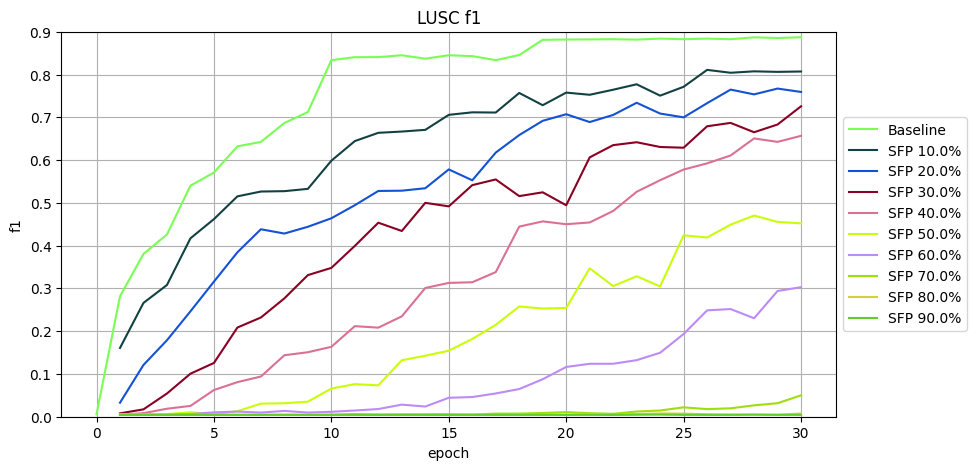

In [3]:
exps = {**baseline}
exps.update(sfp_exps['percentage'])
ax = show_train_scores(
    exps=exps,
    metric='f1',
    show_std=False,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 0.9),
    figsize=(10, 5),
    # saving_path='f1.png'
)

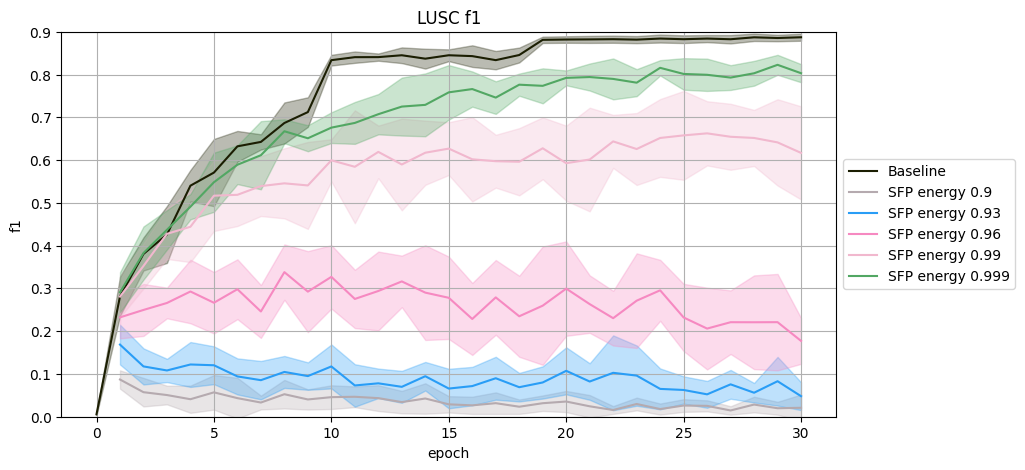

In [4]:
exps = {**baseline}
exps.update(sfp_exps['energy'])
ax = show_train_scores(
    exps=exps,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 0.9),
    figsize=(10, 5),
    # saving_path='f1.png'
)

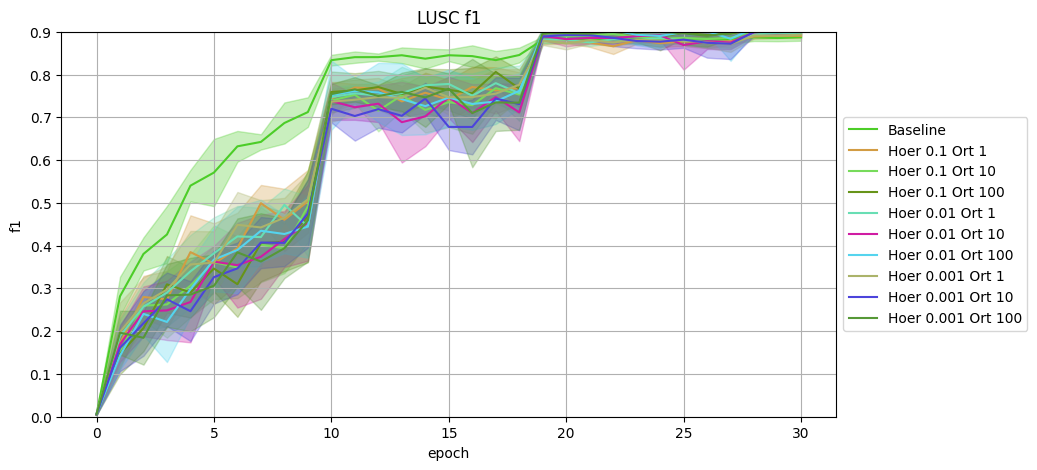

In [5]:
exps = {**baseline}
exps.update(svd_exps['channel'])
ax = show_train_scores(
    exps=exps,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 0.9),
    figsize=(10, 5),
    # saving_path='f1.png'
)

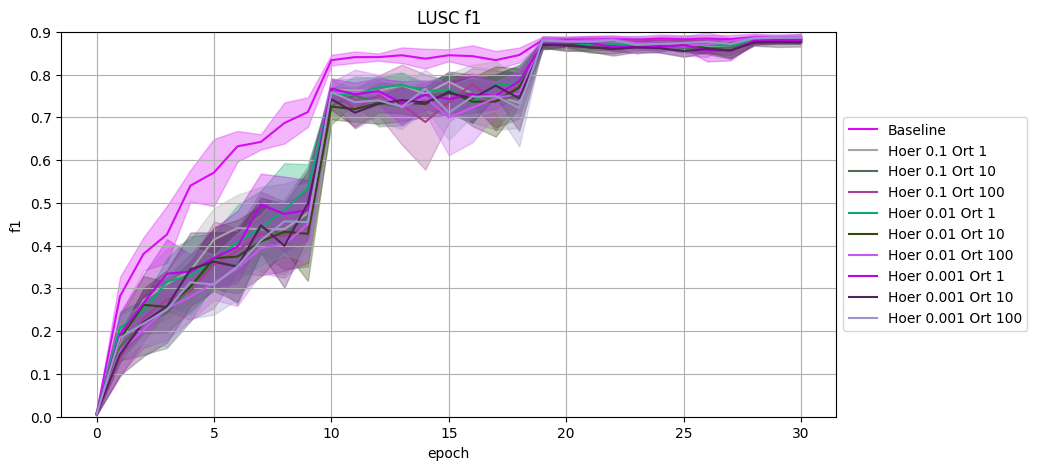

In [6]:
exps = {**baseline}
exps.update(svd_exps['spatial'])
ax = show_train_scores(
    exps=exps,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 0.9),
    figsize=(10, 5),
    # saving_path='f1.png'
)

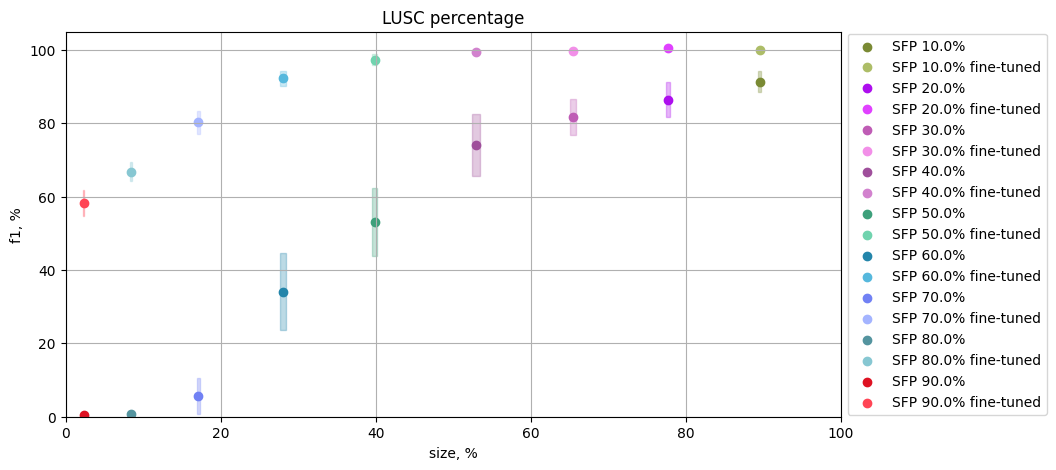

In [7]:
ax = show_sfp_results(
    sfp_exps=sfp_per,
    figsize=(10, 5),
    title=f'{ds_name} percentage',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(0, 105),
    xlim=(0, 100)
)

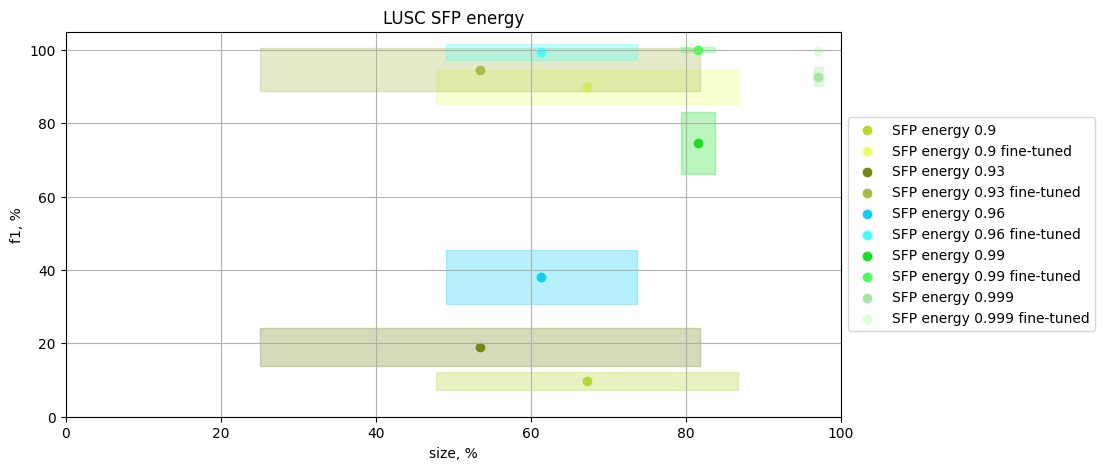

In [8]:
ax = show_sfp_results(
    sfp_exps=sfp_energy,
    figsize=(10, 5),
    title=f'{ds_name} SFP energy',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(0, 105),
    xlim=(0, 100)
)

In [9]:
channel_exps = {k: v for k, v in svd_channel.items() if 'Hoer 0.1' in k}

In [ ]:
channel_exps = {k: v for k, v in svd_channel.items() if k.endswith('Ort 100')}

In [ ]:
channel_exps = {k: v[['size', 'fine-tuned']] for k, v in svd_channel.items()}

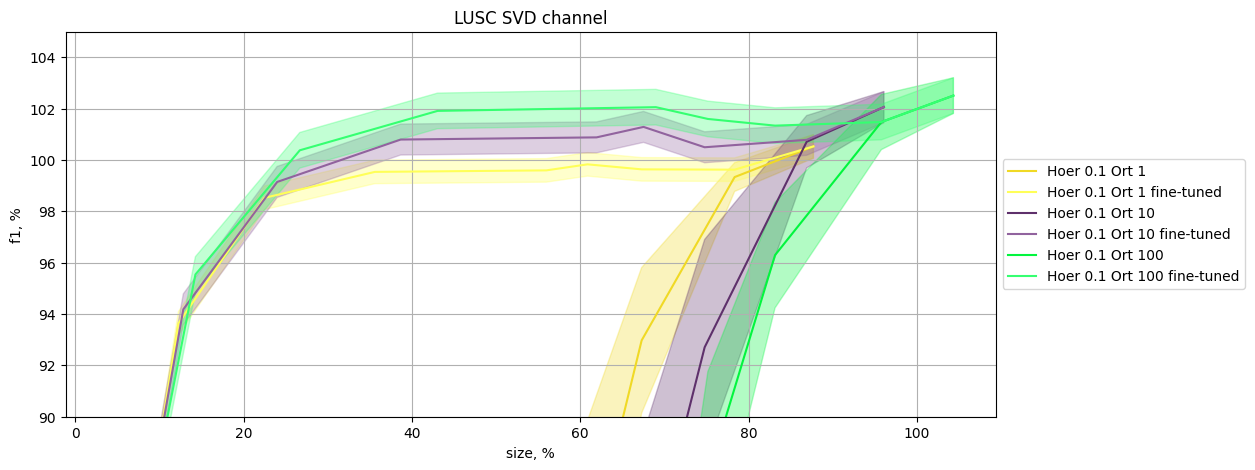

In [10]:
ax = show_svd_results(
    svd_exps=channel_exps,
    figsize=(12, 5),
    title=f'{ds_name} SVD channel',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(90, 105),
    # xlim=(0, 100)
)

In [11]:
spatial_exps = {k: v for k, v in svd_spatial.items() if 'Hoer 0.1' in k}

In [ ]:
spatial_exps = {k: v for k, v in svd_spatial.items() if k.endswith('Ort 100')}

In [ ]:
spatial_exps = {k: v[['pruned', 'fine-tuned']] for k, v in svd_spatial.items() if 'Hoer 0.1' in k }

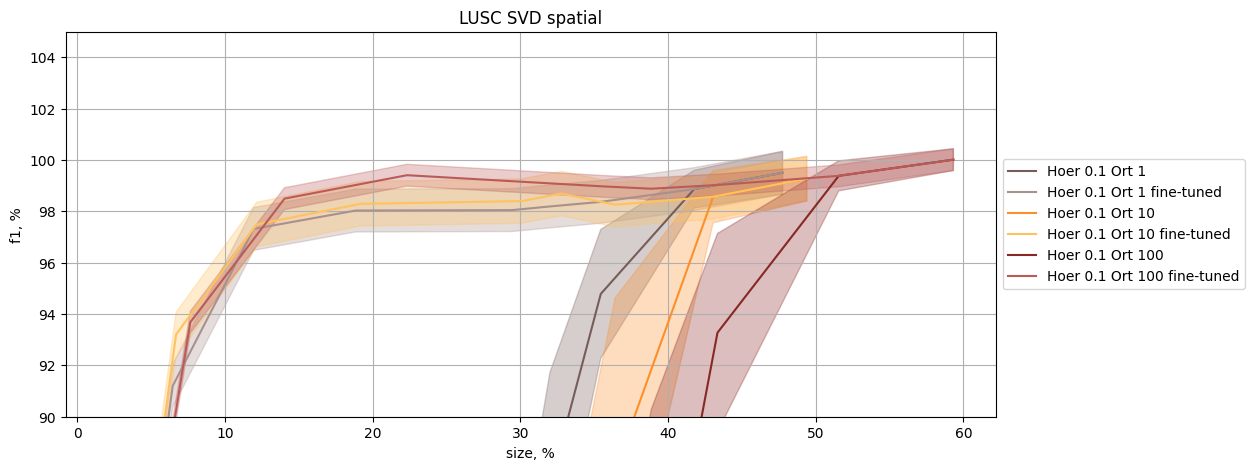

In [12]:
ax = show_svd_results(
    svd_exps=spatial_exps,
    figsize=(12, 5),
    title=f'{ds_name} SVD spatial',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(90, 105),
    # xlim=(0, 100)
)

In [3]:
best_svd = dict(channel = 'Hoer 0.1 Ort 100', spatial = 'Hoer 0.1 Ort 100')

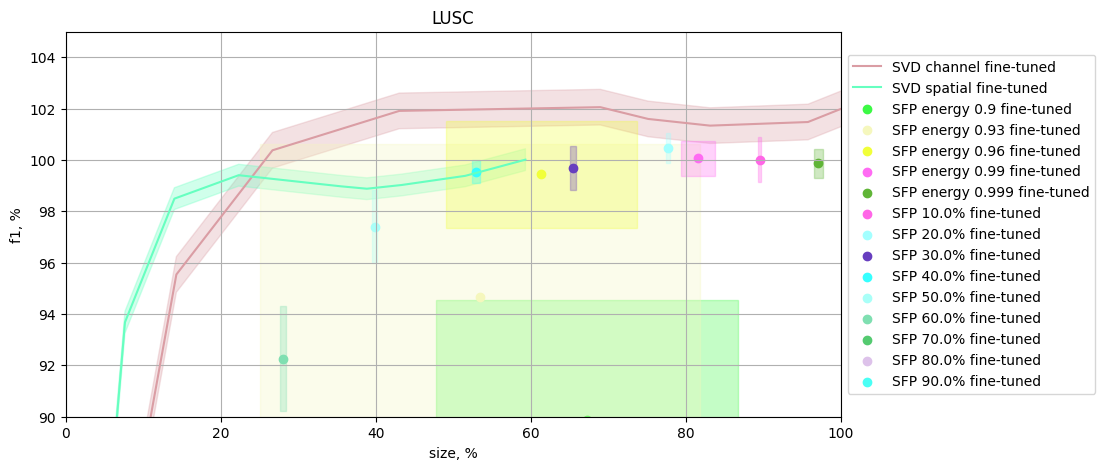

In [4]:
ax = show_svd_sfp_results(
    sfp_exps=pd.concat([sfp_energy, sfp_per])[['size', 'size std', 'fine-tuned', 'fine-tuned std']],
    svd_exps={
        'SVD channel': svd_channel[best_svd['channel']][['size', 'fine-tuned', 'fine-tuned std']],
        'SVD spatial': svd_spatial[best_svd['spatial']][['size', 'fine-tuned', 'fine-tuned std']],
    },
    figsize=(10, 5),
    title=f'{ds_name}', # best fine-tuned',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(90, 105),
    xlim=(0, 100)
)

In [5]:
results = {}
for percent in [100, 99, 97]:
    for phase in ['pruned', 'fine-tuned']:
        results[f'{percent}% {phase}'] = {
            "SFP percent": f"{sfp_per.loc[sfp_per[phase]>=percent]['size'].min():.0f}",
            "SFP energy": f"{sfp_energy.loc[sfp_energy[phase]>=percent]['size'].min():.0f}",
            "SVD channel": f"{svd_channel[best_svd['channel']].loc[svd_channel[best_svd['channel']][phase]>=percent]['size'].min():.0f}",
            "SVD spatial": f"{svd_spatial[best_svd['spatial']].loc[svd_spatial[best_svd['spatial']][phase]>=percent]['size'].min():.0f}"
        }
results_tabel = pd.DataFrame(results).T
results_tabel

,SFP percent,SFP energy,SVD channel,SVD spatial
100% pruned,nan,nan,96,59
100% fine-tuned,78,82,27,59
99% pruned,nan,nan,96,52
99% fine-tuned,53,61,27,22
97% pruned,nan,nan,96,52
97% fine-tuned,40,61,27,14


## FLOP

In [6]:
percent = 99
best_exps = dict(
    channel=svd_channel[best_svd['channel']].loc[svd_channel[best_svd['channel']]['fine-tuned']>=percent]['size'].idxmin(),
    spatial=svd_spatial[best_svd['spatial']].loc[svd_spatial[best_svd['spatial']]['fine-tuned']>=percent]['size'].idxmin(),
    percentage=sfp_per.loc[sfp_per['fine-tuned']>=percent]['size'].idxmin(),
    energy=sfp_energy.loc[sfp_energy['fine-tuned']>=percent]['size'].idxmin()
)
best_exps

{'channel': 'e_0.5',
 'spatial': 'e_0.7',
 'percentage': 'SFP 40.0%',
 'energy': 'SFP energy 0.96'}

In [7]:
from os import path
import torch
from torchvision.models import resnet18
from fedot_ind.core.operation.optimization.svd_tools import load_svd_state_dict
from fedot_ind.core.operation.optimization.sfp_tools import load_sfp_resnet_model


models = {'baseline': resnet18(num_classes=21)}
sd_path = path.join(path.split(baseline['Baseline'])[0],'0_0','train.sd.pt')
models['baseline'].load_state_dict(torch.load(sd_path))
stats = {'size': {'baseline': os.path.getsize(sd_path)}}

for dec_mode in ['channel', 'spatial']:
    sd_path = path.join(path.split(svd_exps[dec_mode][best_svd[dec_mode]])[0],'0_0', f'{best_exps[dec_mode]}.sd.pt')
    for forward_mode in ['one_layer', 'two_layers', 'three_layers']:
        model = resnet18(num_classes=21)
        load_svd_state_dict(model=model, decomposing_mode=dec_mode, state_dict_path=sd_path, forward_mode=forward_mode)
        models[f'SVD {dec_mode} {forward_mode}'] = model
        stats['size'][f'SVD {dec_mode} {forward_mode}'] = os.path.getsize(sd_path)

for zeroing_mode in ['percentage', 'energy']:
    sd_path = path.join(path.split(sfp_exps[zeroing_mode][best_exps[zeroing_mode]])[0],'0_0', 'pruned.sd.pt')
    models[best_exps[zeroing_mode]] = load_sfp_resnet_model(sd_path)
    stats['size'][best_exps[zeroing_mode]] = os.path.getsize(sd_path)

In [ ]:
from optim.flops import flop

stats['flop'] = {}
for name, model in models.items():
    f = flop(model, ds_name, input_size=(32, 3, 28, 28))
    stats['flop'][name] = sum([v['flops'] for v in f.values()])

## val

In [ ]:
from datetime import datetime
from torch.utils.data import Subset, DataLoader
from fedot_ind.core.architecture.experiment.nn_experimenter import ClassificationExperimenter
from experiments.classificaion.exp_parameters import TASKS


dataset, _ = TASKS[ds_name]['dataset']()
val_dl = DataLoader(dataset, batch_size=32, num_workers=8)

stats['time'] = {}
stats['f1'] = {}

for name, model in models.items():
    exp = ClassificationExperimenter(model=model)
    print(name)
    start_t = datetime.now()
    for _ in range(5):
        metrics = exp.val_loop(val_dl)
    print(metrics['f1'])
    stats['time'][name] = datetime.now() - start_t
    stats['f1'][name] = metrics['f1']

In [13]:
compare_df = pd.DataFrame(stats)
compare_df['flop, %'] = compare_df['flop'] / compare_df.loc['baseline', 'flop'] * 100
compare_df['size, %'] = compare_df['size'] / compare_df.loc['baseline', 'size'] * 100
compare_df['f1, %'] = compare_df['f1'] / compare_df.loc['baseline', 'f1'] * 100
compare_df['time, %'] = compare_df['time'] / compare_df.loc['baseline', 'time'] * 100
compare_df.loc[:, 'flop, %' : 'time, %']

,"flop, %","size, %","f1, %","time, %"
baseline,100.000000,100.000000,100.000000,100.000000
SVD channel one_layer,206.970962,27.171585,99.967993,105.249560
SVD channel two_layers,56.054915,27.171585,99.968263,98.448618
SVD channel three_layers,32.065304,27.171585,99.967993,99.661067
SVD spatial one_layer,249.457500,23.264426,100.655271,107.177554
SVD spatial two_layers,49.281188,23.264426,100.656056,95.998461
SVD spatial three_layers,38.358071,23.264426,100.655461,104.581419
SFP 40.0%,52.254703,52.151958,100.394302,92.078415
SFP energy 0.96,70.335750,77.608529,98.823782,98.627030


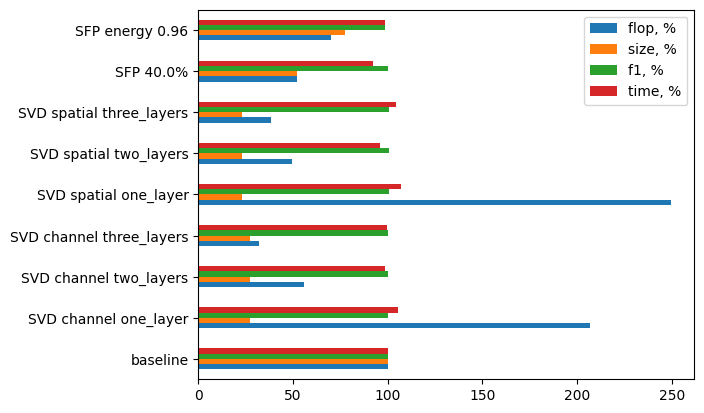

In [14]:
compare_df.iloc[:, 4:8].plot(kind='barh');